In [1]:
import xarray as xr
import numpy as np
import netCDF4 as nc
import bisectm as bisectm
import lkTables as lk


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): dim_0(289), dim_1(8)
    variables(dimensions): float32 kextR(dim_0, dim_1), float32 salbR(dim_0, dim_1), float32 asymR(dim_0, dim_1), float32 kextS(dim_0, dim_1), float32 salbS(dim_0, dim_1), float32 asymS(dim_0, dim_1), float32 kextG(dim_0, dim_1), float32 salbG(dim_0, dim_1), float32 asymG(dim_0, dim_1)
    groups: 


In [2]:
scatTables=lk.scattTables()

In [3]:
#print(np.array(z_meas_L).shape)
#z_meas_x=xr.DataArray(np.array(z_meas_L),dims=["nt","nbins","nchan"])
#bzd_x=xr.DataArray(np.array(bzdL),dims=["nt"])
#sfcPrecip_dpr_x=xr.DataArray(np.array(sfcPrecip_dprL),dims=["nt"])
#sfcPrecip_cmb_x=xr.DataArray(np.array(sfcPrecip_cmbL),dims=["nt"])
#stormTop_x=xr.DataArray(np.array(stormTopL),dims=["nt"])
#bcf_x=xr.DataArray(np.array(bcfL),dims=["nt"])
#bsfc_x=xr.DataArray(np.array(bsfcL)[:,0],dims=["nt"])
#dm_cmb_x=xr.DataArray(np.array(dm_cmb_L),dims=["nt","nbins_cmb"])
#precip_rate_cmb_x=xr.DataArray(np.array(precip_rate_cmbL),dims=["nt","nbins_cmb"])
#ptype_x=xr.DataArray(np.array(pTypeL),dims=["nt"])
#ds=xr.Dataset({"z_meas":z_meas_x,"bzd":bzd_x,"sfcPrecip_dpr":sfcPrecip_dpr_x,"sfcPrecip_cmb":sfcPrecip_cmb_x,"stormTop":stormTop_x,"bcf":bcf_x,"bsfc":bsfc_x,"dm_cmb":dm_cmb_x,"precip_rate_cmb":precip_rate_cmb_x,"pType":ptype_x})
#compLev=5
#encoding={"z_meas": {"zlib": True, "complevel": compLev},"bzd": {"zlib": True, "complevel": compLev},"sfcPrecip_dpr": {"zlib": True, "complevel": compLev},"sfcPrecip_cmb": {"zlib": True, "complevel": compLev},"stormTop": {"zlib": True, "complevel": compLev},"bcf": {"zlib": True, "complevel": compLev},"bsfc": {"zlib": True, "complevel": compLev},"dm_cmb": {"zlib": True, "complevel": compLev},"precip_rate_cmb": {"zlib": True, "complevel": compLev}}
#ds.to_netcdf("dpr_cmb.nc",encoding=encoding)
with nc.Dataset('dpr_cmb.nc') as f:
    z_meas=f.variables["z_meas"][:]
    bzd=f.variables["bzd"][:]
    pType=f.variables["pType"][:]
    dm_cmb=f.variables["dm_cmb"][:]
    precip_rate_cmb=f.variables["precip_rate_cmb"][:]

In [4]:
a=np.nonzero((bzd-150)*(bzd-142)<0)
b=np.nonzero(pType[a]==1)
dm_cmb[dm_cmb<0]=0
print(len(a[0]))
z_meas_a=z_meas[a][b]
z_meas_a[z_meas_a<0]=0

h1_res=175*0.125-np.arange(100,168)*.125
h1=175*0.125-np.arange(50,83)*.25
h1_res_rev=h1_res[::-1]
h1_rev=h1[::-1]
precip_rate_cmb_L=[]
dm_cmb_L=[]
rel_range=[]
for i in a[0][b]:
    rel_h=h1_res-(175-bzd[i])*0.125
    precip_interp=np.interp(h1_res_rev,h1_rev,precip_rate_cmb[i][50:83][::-1])
    dm_interp=np.interp(h1_res_rev,h1_rev,dm_cmb[i][50:83][::-1])
    precip_rate_cmb_L.append(precip_interp[::-1])
    dm_cmb_L.append(dm_interp[::-1])
    rel_range.append(-rel_h)

30046


In [5]:
import xarray as xr
z_meas_x=xr.DataArray(z_meas_a,dims=["nt","nbins_dpr","nchan"])
ptype_x=xr.DataArray(pType[a][b],dims=["nt"])
dm_cmb_x=xr.DataArray(np.array(dm_cmb_L),dims=["nt","nbins_cmb"])
precip_rate_cmb_x=xr.DataArray(np.array(precip_rate_cmb_L),dims=["nt","nbins_cmb"])
rel_range_x=xr.DataArray(np.array(rel_range),dims=["nt","nbins_cmb"])
ds=xr.Dataset({"z_meas":z_meas_x,"pType":ptype_x,"dm_cmb":dm_cmb_x,"precip_rate_cmb":precip_rate_cmb_x,"rel_range":rel_range_x})

compLev=5
encoding={"z_meas": {"zlib": True, "complevel": compLev},"pType": {"zlib": True, "complevel": compLev},"dm_cmb": {"zlib": True, "complevel": compLev},"precip_rate_cmb": {"zlib": True, "complevel": compLev},"rel_range": {"zlib": True, "complevel": compLev}}
ds.to_netcdf("dpr_cmb_training.nc",encoding=encoding)

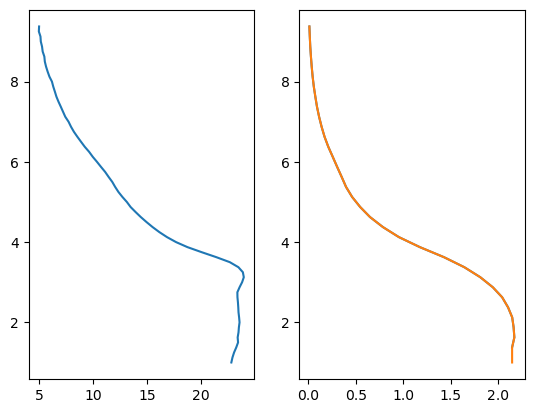

In [6]:
precip_rate_cmb_L=np.array(precip_rate_cmb_L)
import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(z_meas_a.mean(axis=0)[100:,0],175*0.125-np.arange(100,168)*.125)
#plt.ylim(1,8)
plt.subplot(122)
plt.plot(precip_rate_cmb[a][b].mean(axis=0)[50:],175*0.125-np.arange(50,83)*.25)
plt.plot(precip_rate_cmb_L.mean(axis=0),h1_res)
#plt.ylim(1,8)

In [7]:
with nc.Dataset("dpr_cmb_training.nc") as f:
    z_meas=f["z_meas"][:]
    pType=f["pType"][:]
    dm_cmb=f["dm_cmb"][:]
    precip_rate_cmb=f["precip_rate_cmb"][:]
    rel_range=f["rel_range"][:]

from sklearn.preprocessing import StandardScaler
import numpy as np

scalerZ=StandardScaler()
scalerPrecip=StandardScaler()
scalerZ.fit(z_meas[:,:,0])
z_meas_scaled=scalerZ.transform(z_meas[:,:,0])
precip_rate_cmb_scaled=(np.log(1+precip_rate_cmb))
precip_rate_cmb_log_mean=precip_rate_cmb_scaled.mean(axis=0)
precip_rate_cmb_log_std=precip_rate_cmb_scaled.std(axis=0)
precip_rate_cmb_scaled=(precip_rate_cmb_scaled-precip_rate_cmb_log_mean)/(precip_rate_cmb_log_std+0.1)

In [8]:

X=np.array([z_meas_scaled[:,100:],rel_range]).transpose([1,2,0])
y=np.array([precip_rate_cmb_scaled[:,:],dm_cmb[:,:]/2.0]).transpose([1,2,0])
print(X.shape)
print(y.shape)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import LowRankMultivariateNormal

class LSTMUncertaintyModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, rank):
        super(LSTMUncertaintyModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc_mean = nn.Linear(hidden_size, output_size)
        self.fc_low_rank = nn.Linear(hidden_size, output_size * rank)
        self.fc_diag = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_lstm, _ = self.lstm(x)
        mean = self.fc_mean(h_lstm)
        low_rank_factors = self.fc_low_rank(h_lstm)
        diag_cov = self.fc_diag(h_lstm)
        return mean, low_rank_factors, diag_cov

# Define the loss function based on LowRankMultivariateNormal
def low_rank_mvn_loss(mean, low_rank_factors, diag_cov, targets, rank, output_size):
    batch_size, seq_len, _ = low_rank_factors.shape
    low_rank_factors = low_rank_factors.view(batch_size, seq_len, output_size, rank)
    diag_cov = diag_cov.exp()  # Ensure positivity

    # Create the LowRankMultivariateNormal distribution
    distribution = LowRankMultivariateNormal(mean, low_rank_factors, diag_cov)
    
    # Calculate the negative log-likelihood
    nll = -distribution.log_prob(targets)
    
    return nll.mean()

# Hyperparameters
input_size = 2  # Number of input features
hidden_size = 64  # Number of hidden units in LSTM
num_layers = 2  # Number of LSTM layers
output_size =2  # Dimension of the multivariate normal distribution
rank = 4  # Rank for low-rank approximation
learning_rate = 0.001
num_epochs = 100

# Model, Loss, Optimizer
model = LSTMUncertaintyModel(input_size, hidden_size, num_layers, output_size, rank)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#y=model(torch.tensor(X[:1]).float())
#print(y[1].shape)
# import split_train_test
from sklearn.model_selection import train_test_split
n=len(X)
X_train, X_test, y_train, y_test, ind_train, ind_test = train_test_split(X, y, range(n), test_size=0.2, random_state=10)

from torch.utils.data import DataLoader, TensorDataset
train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
test_dataset = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).float())
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)



# Training
num_epochs=10


(16015, 68, 2)
(16015, 68, 2)


In [61]:
print(epoch)

61


In [142]:
num_epochs=20
for epoch in range(num_epochs):
    sum_loss=0
    count=0
    for i, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        mean, low_rank_factors, diag_cov = outputs
        loss = low_rank_mvn_loss(mean, low_rank_factors, diag_cov, targets, rank, output_size)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss+=loss.item()
        count+=1
        if (i+1) % 200 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, len(train_loader), sum_loss/count))

Epoch [1/20], Step [200/401], Loss: -0.8533
Epoch [1/20], Step [400/401], Loss: -1.2500
Epoch [2/20], Step [200/401], Loss: -1.9342
Epoch [2/20], Step [400/401], Loss: -1.6081
Epoch [3/20], Step [200/401], Loss: -1.2655
Epoch [3/20], Step [400/401], Loss: -1.4359
Epoch [4/20], Step [200/401], Loss: -1.9386
Epoch [4/20], Step [400/401], Loss: -1.9234
Epoch [5/20], Step [200/401], Loss: -2.4315
Epoch [5/20], Step [400/401], Loss: -2.2637
Epoch [6/20], Step [200/401], Loss: -1.8430
Epoch [6/20], Step [400/401], Loss: -2.2140
Epoch [7/20], Step [200/401], Loss: -2.1367
Epoch [7/20], Step [400/401], Loss: -1.9790
Epoch [8/20], Step [200/401], Loss: -1.9837
Epoch [8/20], Step [400/401], Loss: -2.1638
Epoch [9/20], Step [200/401], Loss: -2.2845
Epoch [9/20], Step [400/401], Loss: -1.9766
Epoch [10/20], Step [200/401], Loss: -2.5032
Epoch [10/20], Step [400/401], Loss: -2.5590
Epoch [11/20], Step [200/401], Loss: -2.0281
Epoch [11/20], Step [400/401], Loss: -2.2731
Epoch [12/20], Step [200/401

In [9]:
#scripted_model = torch.jit.script(model)
#scripted_model.save("lstm_uncertainty_model.pt")
model=torch.jit.load("lstm_uncertainty_model.pt")

def low_rank_mvn_dstrib(mean, low_rank_factors, diag_cov, rank, output_size):
    batch_size, seq_len, _ = low_rank_factors.shape
    low_rank_factors = low_rank_factors.view(batch_size, seq_len, output_size, rank)
    diag_cov = diag_cov.exp()  # Ensure positivity

    print(low_rank_factors.shape)
    distribution = LowRankMultivariateNormal(mean, low_rank_factors, diag_cov)
    
    # Calculate the negative log-likelihood
    
    return distribution

In [59]:
y_pred=model(torch.tensor(X_test).float())
mean, low_rank_factors, diag_cov = y_pred
distrib=low_rank_mvn_dstrib(mean, 2.0*low_rank_factors, 1*diag_cov, rank, output_size)
print(distrib.sample().shape)

torch.Size([3203, 68, 2, 4])
torch.Size([3203, 68, 2])


In [60]:
y_pred_ens=distrib.sample_n(50)
y_pred_ens_np=y_pred_ens.detach().numpy()

/Users/mgrecu/miniforge3/lib/python3.10/site-packages/torch/distributions/distribution.py:179: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn(


In [65]:
print(rel_range)
import pickle
d={'rel_range':rel_range[0],'precip_rate_cmb_log_mean':precip_rate_cmb_log_mean,'precip_rate_cmb_log_std':precip_rate_cmb_log_std,'scalerZ':scalerZ,'scalerPrecip':scalerPrecip}
with open('dpr_cmb_training.pkl','wb') as f:
    pickle.dump(d,f)

[[-5.625 -5.5   -5.375 ...  2.5    2.625  2.75 ]
 [-5.625 -5.5   -5.375 ...  2.5    2.625  2.75 ]
 [-5.625 -5.5   -5.375 ...  2.5    2.625  2.75 ]
 ...
 [-5.625 -5.5   -5.375 ...  2.5    2.625  2.75 ]
 [-5.625 -5.5   -5.375 ...  2.5    2.625  2.75 ]
 [-5.625 -5.5   -5.375 ...  2.5    2.625  2.75 ]]


In [61]:
print(y_pred_ens_np.shape)
zku_test=z_meas[ind_test][:,100:168,0]
zka_test=z_meas[ind_test][:,100:168,1]
#print(z_meas.shape)
#print(X.shape)
zka_lowest_L=[]
for i in range(zka_test.shape[0]):
    piaKaL=[]
    zka_lowest=[]
    for iens in range(50):

        prate_ret=np.exp(y_pred_ens_np[iens,i,:,0]*precip_rate_cmb_log_std+precip_rate_cmb_log_mean)-1
        dm_ret=y_pred_ens_np[iens,i,:,1]*2.0
        piaKa=0
        prate_ret[prate_ret<1e-3]=1e-3
        for k in range(68):
            if rel_range[i,k]<=0:
                inds=bisectm.bisectm(scatTables.dms.data,252,dm_ret[k])
                if prate_ret[k]<0:
                    continue
                dnw=np.log10(prate_ret[k]/scatTables.snowRate[inds]) 
                piaKa+=scatTables.attKaS[inds]*10**dnw*0.125*2
            else:
                inds=bisectm.bisectm(scatTables.dmr.data,289,dm_ret[k])
                if prate_ret[k]<0:
                    continue
                dnw=np.log10(prate_ret[k]/scatTables.rainRate[inds]) 
                piaKa+=scatTables.attKaR[inds]*10**dnw*0.125*2 
                zka=scatTables.zKaR[inds]+10*dnw
            if k==67:
                zka_lowest.append(zka-piaKa)
    
    zka_lowest_L.append(zka_lowest)


(50, 3203, 68, 2)


[[1.         0.76466526]
 [0.76466526 1.        ]]
[[1.         0.73341382]
 [0.73341382 1.        ]]


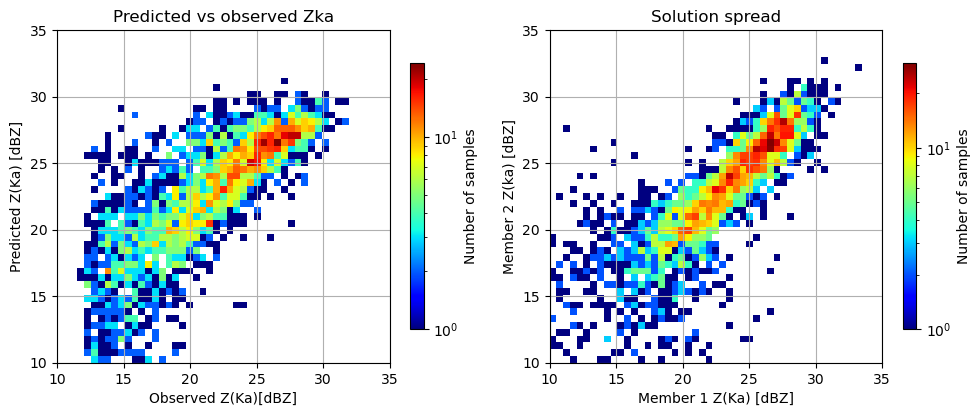

In [64]:
#v=[len(zka_lowest_L[i]) for i in range(300)]
zka_lowest_L=np.array(zka_lowest_L)
#print(zka_lowest_L.shape)
print(np.corrcoef(zka_lowest_L.mean(axis=1),zka_test[:,-1]))
print(np.corrcoef(zka_lowest_L[:,0],zka_lowest_L[:,10]))
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,4))
ax1=plt.subplot(121)
zka_sim_low=zka_lowest_L.mean(axis=1)

ax1.set_aspect(1)

h2d=plt.hist2d(zka_test[:,-1],zka_sim_low,bins=np.linspace(10,35,50),norm=LogNorm(),cmap='jet')
plt.xlabel("Observed Z(Ka)[dBZ]")
plt.ylabel("Predicted Z(Ka) [dBZ]")
plt.colorbar(h2d[3],shrink=0.8,label="Number of samples")
plt.title("Predicted vs observed Zka")
plt.grid()
ax2=plt.subplot(122)
#h2d=plt.hist2d(2*y_test[:,:,1].flatten(),2*mean.detach().numpy()[:,:,1].flatten(),bins=np.linspace(0.4,3,50),norm=LogNorm(),cmap='jet')
h2d=plt.hist2d(zka_lowest_L[:,0],zka_lowest_L[:,10],bins=np.linspace(10,35,50),norm=LogNorm(),cmap='jet')
ax2.set_aspect(1)
plt.xlabel("Member 1 Z(Ka) [dBZ]")
plt.ylabel("Member 2 Z(ka) [dBZ]")
plt.title("Solution spread")
plt.grid()
#plt.xlabel("True Dm [mm]")
#plt.ylabel("Predicted Dm [mm]")
plt.colorbar(h2d[3],shrink=0.8,label="Number of samples")
plt.tight_layout()
plt.savefig('zka_validation.png',dpi=300)

In [25]:
print(zka_lowest)

[23.951287015233483, 24.655948422267084, 24.499255694035767, 23.575378570512342, 22.76463392381557, 24.024136421906043, 23.506914045381265, 23.777657544554838, 23.62218001863358, 23.715875624027905, 23.590065260022275, 22.809475147346024, 23.287527950715404, 24.074607363765473, 23.70374461098793, 22.902119575392692, 23.784338036905886, 23.91226444815023, 22.82311622371822, 24.74551239887581, 24.859457930772972, 24.118280260318038, 24.125618420159483, 23.045937286738656, 24.005731334060336, 23.658599617918895, 24.218026458687937, 23.393546938691784, 23.17185976522484, 23.63570927254433, 24.31474176474674, 23.98530313380438, 22.97010360793904, 23.947187938798766, 23.176830862249687, 22.08870034676886, 24.23717425583043, 24.182766868387944, 23.957257463019392, 23.533444621955944, 24.853835942585647, 23.220161178553564, 21.680082159720456, 23.097421354910825, 24.272453044735716, 23.547542332372288, 23.62451604694967, 23.83237675879836, 22.915577928047203, 23.65575965378448]


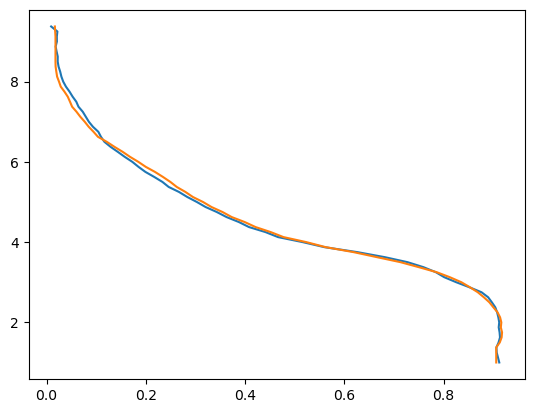

In [11]:
plt.plot(mean.detach().numpy()[:,:,0].mean(axis=0)+precip_rate_cmb_log_mean,h1_res)
plt.plot(y_test[:,:,0].mean(axis=0)+precip_rate_cmb_log_mean,h1_res)

[[1.         0.93532879]
 [0.93532879 1.        ]]


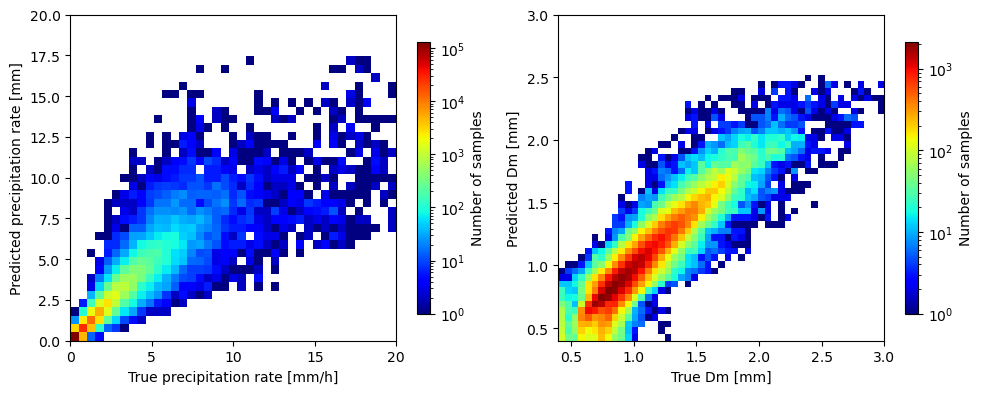

In [138]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,4))
ax1=plt.subplot(121)
p1=np.exp(mean.detach().numpy()[:,:,0]*precip_rate_cmb_log_std+precip_rate_cmb_log_mean)-1
p2=np.exp(y_test[:,:,0]*precip_rate_cmb_log_std+precip_rate_cmb_log_mean)-1
print(np.corrcoef(p1.flatten(),p2.flatten()))
ax1.set_aspect(1)

h2d=plt.hist2d(p2.flatten(),p1.flatten(),bins=np.linspace(0,20,40),norm=LogNorm(),cmap='jet')
plt.xlabel("True precipitation rate [mm/h]")
plt.ylabel("Predicted precipitation rate [mm]")
plt.colorbar(h2d[3],shrink=0.8,label="Number of samples")
ax2=plt.subplot(122)
h2d=plt.hist2d(2*y_test[:,:,1].flatten(),2*mean.detach().numpy()[:,:,1].flatten(),bins=np.linspace(0.4,3,50),norm=LogNorm(),cmap='jet')
ax2.set_aspect(1)
plt.xlabel("True Dm [mm]")
plt.ylabel("Predicted Dm [mm]")
plt.colorbar(h2d[3],shrink=0.8,label="Number of samples")
plt.tight_layout()
plt.savefig('ltsm_validation.png',dpi=300)

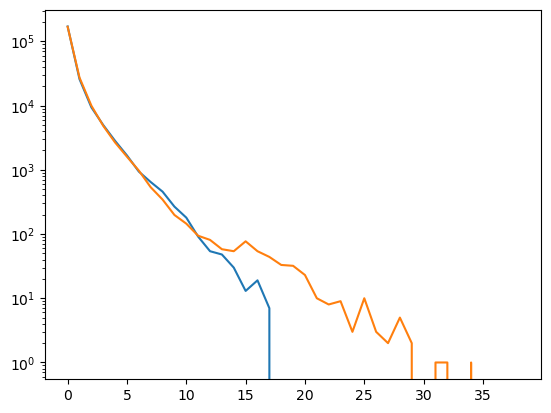

In [122]:
ph1=np.histogram(p1.flatten(),bins=np.linspace(0,40,40))
ph2=np.histogram(p2.flatten(),bins=np.linspace(0,40,40))
plt.semilogy(ph1[0])
plt.semilogy(ph2[0])


In [119]:
print(p2.max())

1825.9091394238278


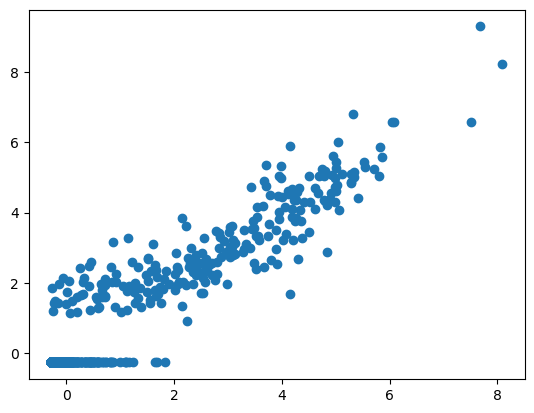

In [62]:
y_pred=model(torch.tensor(X_test).float())
mean, low_rank_factors, diag_cov = y_pred
y_mean_numpy=mean.detach().numpy()
plt.scatter(y_mean_numpy[:,10,0].flatten(),y_test[:,10,0].flatten())